In [2]:
# This script analizes all the combinations global msa - local msa for kinase proteins containing cis regulatory elements (CREs)

In [31]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
region_to_transfer = pd.read_csv('../homology_transfer/pipeline_MSA_uniprot/data_snake/12_region_to_transfer.txt', sep=' ')
region_to_transfer
region_to_transfer['region'] = region_to_transfer.term_id
region_to_transfer.region = region_to_transfer.region.apply(lambda x: re.findall('\D+', x)[0])

,ref_uniprot_acc,ref_start,ref_end,method,full_identity,region_identity,quality_full,quality_region,uniprot_acc,start,end,term_id
0,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,F8CEZ6,1,265,kd1
1,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,E1EVZ2,5,261,kd1
2,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A5DH79,10,272,kd1
3,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A0A671V988,13,271,kd1
4,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A0A6P3EUQ4,14,272,kd1
...,...,...,...,...,...,...,...,...,...,...,...,...
182228,W7JX98,541,798,clustalO,all,all,0.787,0.838,A0A0D9QPF1,572,829,kd286
182229,W7JX98,541,798,clustalO,all,60,0.787,1.000,A0A061DD08,574,823,kd286
182230,W7JX98,541,798,clustalO,all,all,0.787,0.838,A0A061DD08,574,823,kd286
182231,W7JX98,541,798,clustalO,all,60,0.787,1.000,Q4UBS1,582,837,kd286


In [48]:
# region_to_transfer.pivot_table(
#     values= "quality_region", 
#     index= ['full_identity', 'region_identity'],
#     columns= 'region',
#     #aggfunc= [min, max, np.mean]
# )

In [47]:
#region_to_transfer.groupby(['full_identity', 'region_identity']).size()

In [28]:
region_to_transfer['variable'] = region_to_transfer['full_identity'] + "-" + region_to_transfer['region_identity']

In [43]:
order = region_to_transfer['variable'].value_counts().index.sort_values().to_list()

In [64]:
region_to_transfer.quality_region.describe()

count    182233.000000
mean          0.996164
std           0.261954
min           0.606000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.702000
Name: quality_region, dtype: float64

In [69]:
region_to_transfer.iloc[:,0:-1]

,ref_uniprot_acc,ref_start,ref_end,method,full_identity,region_identity,quality_full,quality_region,uniprot_acc,start,end,term_id,region
0,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,F8CEZ6,1,265,kd1,kd
1,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,E1EVZ2,5,261,kd1,kd
2,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A5DH79,10,272,kd1,kd
3,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A0A671V988,13,271,kd1,kd
4,A0A2I0BVG8,56,325,clustalO,all,all,0.903,0.747,A0A6P3EUQ4,14,272,kd1,kd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182228,W7JX98,541,798,clustalO,all,all,0.787,0.838,A0A0D9QPF1,572,829,kd286,kd
182229,W7JX98,541,798,clustalO,all,60,0.787,1.000,A0A061DD08,574,823,kd286,kd
182230,W7JX98,541,798,clustalO,all,all,0.787,0.838,A0A061DD08,574,823,kd286,kd
182231,W7JX98,541,798,clustalO,all,60,0.787,1.000,Q4UBS1,582,837,kd286,kd


In [75]:
#region_to_transfer['quality_region_norm'] = region_to_transfer[['quality_region']].apply(lambda x: (x - x.mean()/ x.std()))

In [78]:
# min max scaler
region_to_transfer['quality_region_norm'] = region_to_transfer['quality_region'] / region_to_transfer['quality_region'].abs().max()

In [81]:
region_to_transfer['quality_region_log'] = np.log(region_to_transfer['quality_region'])

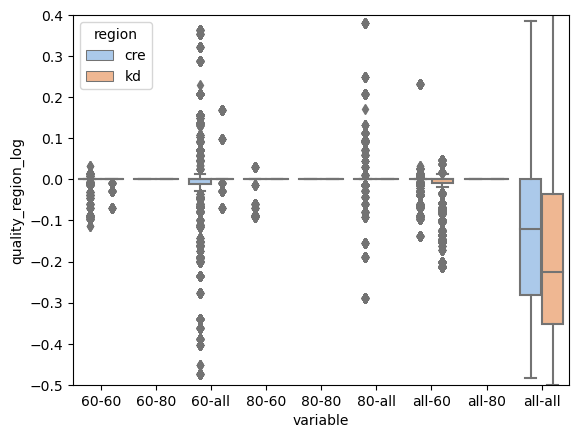

In [85]:
sns.set_palette("pastel")
sns.boxplot(data= region_to_transfer, x= 'variable', y= 'quality_region_log', hue= 'region', order= order, hue_order= ['cre', 'kd'])
plt.ylim((-0.5, .4))
plt.show()

In [57]:
region_count = region_to_transfer.groupby(['variable', 'region']).size().reset_index().rename(
    columns= {0: 'protein_count'}
) #.plot(kind='bar')

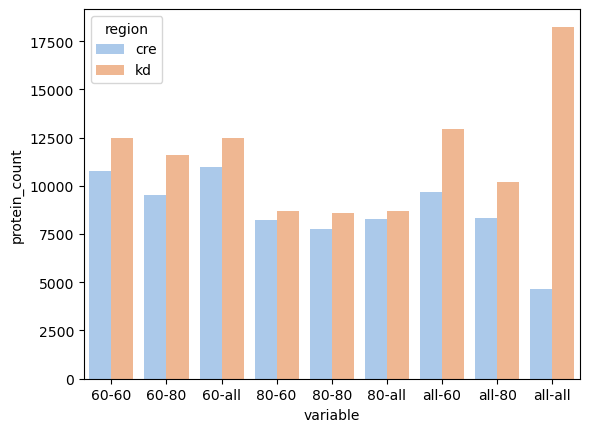

In [62]:
sns.set_palette("pastel")
sns.barplot(data= region_count, x= 'variable', y= 'protein_count', hue= 'region', order= order, hue_order= ['cre', 'kd'])
plt.show()